In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [2]:
# Load the dataset
df = pd.read_csv('Fifa_world_cup_matches.csv')

# Display the first few rows of the dataframe
df.head()


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [3]:
# Display basic information about the dataset
df.info()

# Summary statistics for numerical columns
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 88 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   team1                                                  64 non-null     object
 1   team2                                                  64 non-null     object
 2   possession team1                                       64 non-null     object
 3   possession team2                                       64 non-null     object
 4   possession in contest                                  64 non-null     object
 5   number of goals team1                                  64 non-null     int64 
 6   number of goals team2                                  64 non-null     int64 
 7   date                                                   64 non-null     object
 8   hour                                                   64 non-

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

In [4]:
# Drop rows with missing values (if necessary)
df = df.dropna()

# Convert columns to appropriate data types if needed
df['date'] = pd.to_datetime(df['date'])


/tmp/ipykernel_28973/966606166.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


ValueError: No objects to concatenate

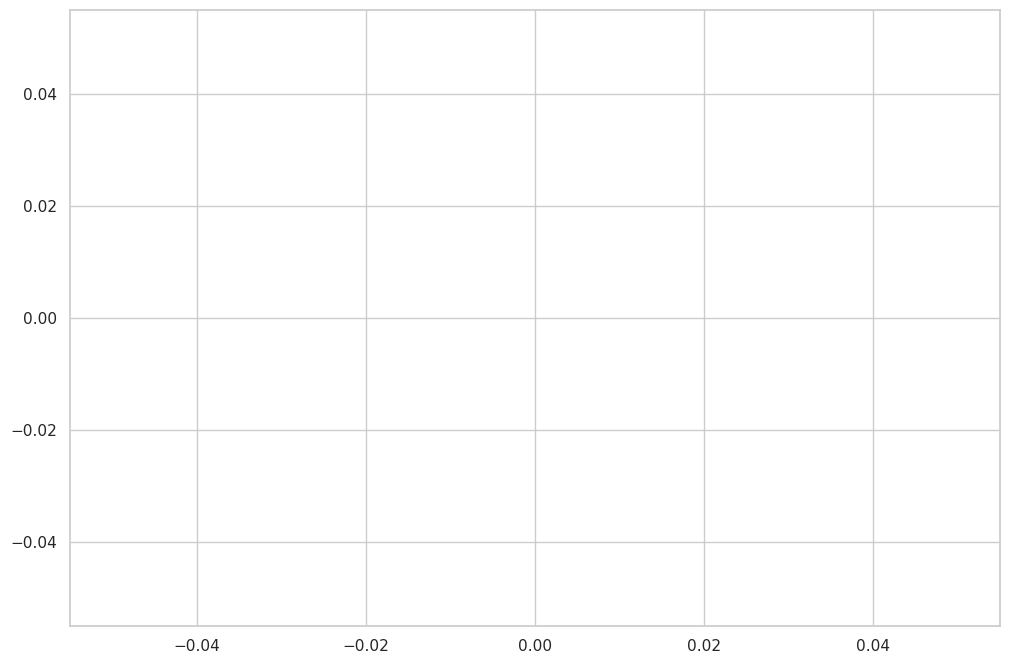

In [5]:
# Plot distribution of goals scored by each team
plt.figure(figsize=(12, 8))
sns.histplot(df[['team1', 'team2']], kde=False, bins=20)
plt.title('Distribution of Goals Scored')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.show()


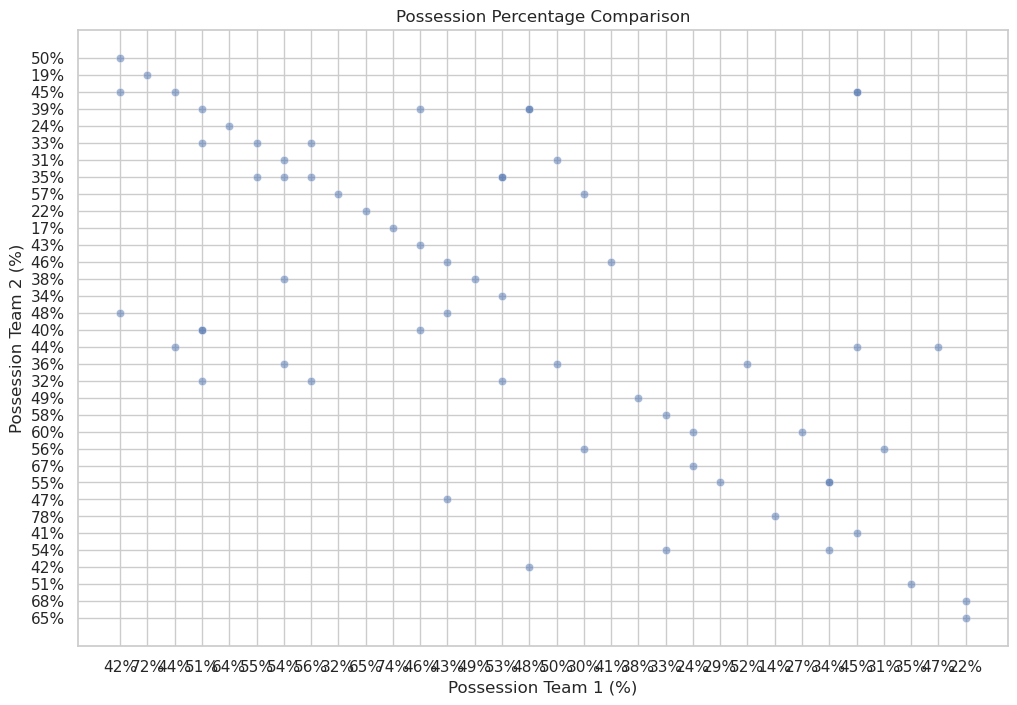

In [6]:
# Plot possession percentages for both teams
plt.figure(figsize=(12, 8))
sns.scatterplot(x='possession team1', y='possession team2', data=df, alpha=0.5)
plt.title('Possession Percentage Comparison')
plt.xlabel('Possession Team 1 (%)')
plt.ylabel('Possession Team 2 (%)')
plt.show()


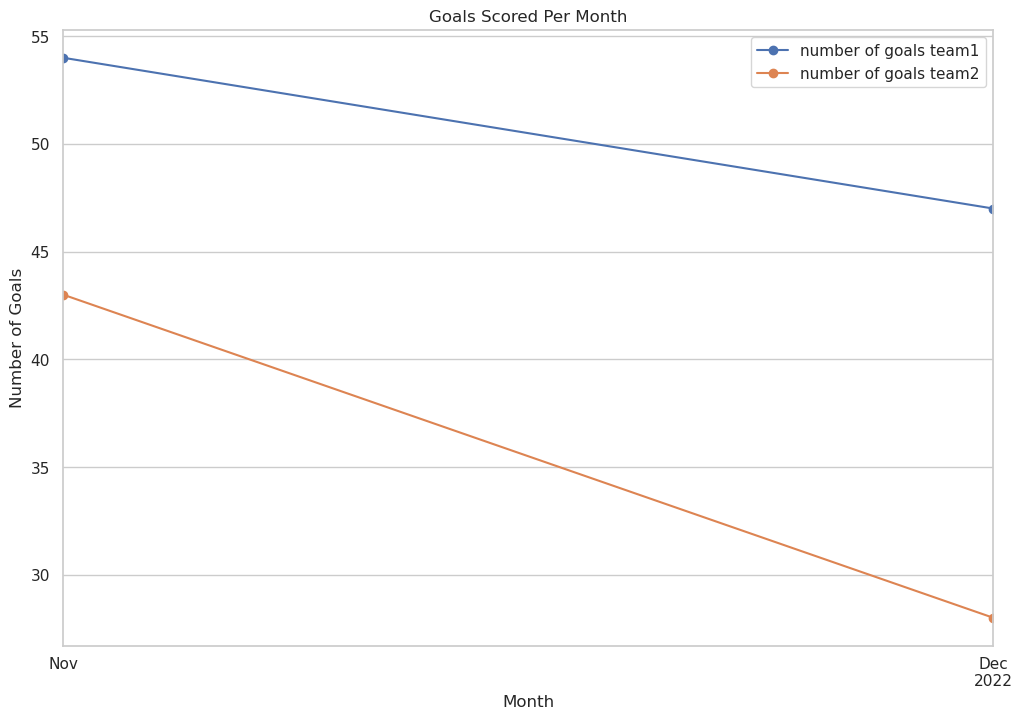

In [7]:
# Plot number of goals over time
df['month'] = df['date'].dt.to_period('M')
monthly_goals = df.groupby('month').agg({'number of goals team1': 'sum', 'number of goals team2': 'sum'})
monthly_goals.plot(figsize=(12, 8), marker='o')
plt.title('Goals Scored Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Goals')
plt.show()


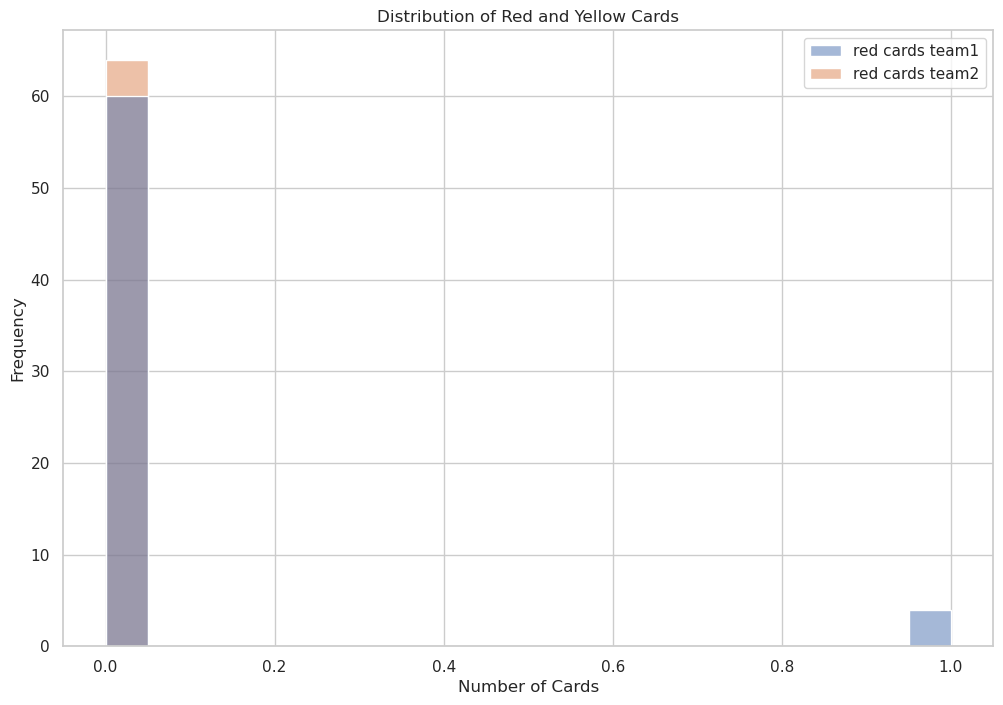

In [8]:
# Distribution of red and yellow cards
plt.figure(figsize=(12, 8))
sns.histplot(df[['red cards team1', 'red cards team2']], kde=False, bins=20)
plt.title('Distribution of Red and Yellow Cards')
plt.xlabel('Number of Cards')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Calculate correlation matrix
corr = df[['possession team1', 'possession team2', 'number of goals team1', 'number of goals team2', 'crosses', 'fouls', 'attempts']].corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


KeyError: "['crosses', 'fouls', 'attempts'] not in index"

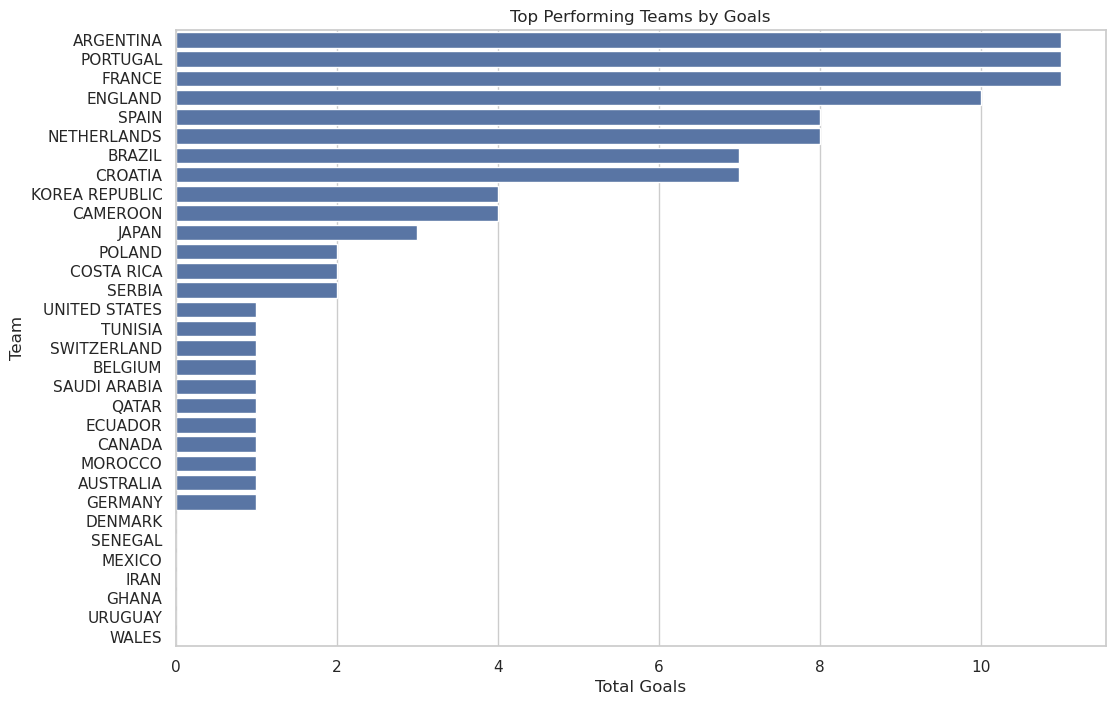

In [10]:
# Aggregate goals by team
team_goals = df.groupby('team1').agg({'number of goals team1': 'sum'}).reset_index()
team_goals.columns = ['Team', 'Goals']
top_teams = team_goals.sort_values(by='Goals', ascending=False)

# Plot top teams
plt.figure(figsize=(12, 8))
sns.barplot(x='Goals', y='Team', data=top_teams)
plt.title('Top Performing Teams by Goals')
plt.xlabel('Total Goals')
plt.ylabel('Team')
plt.show()
